In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
mobile_usage = pd.read_csv("mobile_usage_behavioral_analysis.csv")
user_behavior = pd.read_csv("user_behavior_dataset.csv")

In [3]:
print("Mobile Usage Dataset Overview:")
print(mobile_usage.info())
print(mobile_usage.head())

Mobile Usage Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Total_App_Usage_Hours         1000 non-null   float64
 4   Daily_Screen_Time_Hours       1000 non-null   float64
 5   Number_of_Apps_Used           1000 non-null   int64  
 6   Social_Media_Usage_Hours      1000 non-null   float64
 7   Productivity_App_Usage_Hours  1000 non-null   float64
 8   Gaming_App_Usage_Hours        1000 non-null   float64
 9   Location                      1000 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 78.3+ KB
None
   User_ID  Age  Gender  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
0        1  

In [4]:
print("\nUser Behavior Dataset Overview:")
print(user_behavior.info())
print(user_behavior.head())


User Behavior Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None
   User ID    Device Model Operating System  App Usag

In [5]:
print("\nMissing Values in Mobile Usage Dataset:")
print(mobile_usage.isnull().sum())


Missing Values in Mobile Usage Dataset:
User_ID                         0
Age                             0
Gender                          0
Total_App_Usage_Hours           0
Daily_Screen_Time_Hours         0
Number_of_Apps_Used             0
Social_Media_Usage_Hours        0
Productivity_App_Usage_Hours    0
Gaming_App_Usage_Hours          0
Location                        0
dtype: int64


In [6]:
print("\nMissing Values in User Behavior Dataset:")
print(user_behavior.isnull().sum())


Missing Values in User Behavior Dataset:
User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


<Figure size 1500x1000 with 0 Axes>

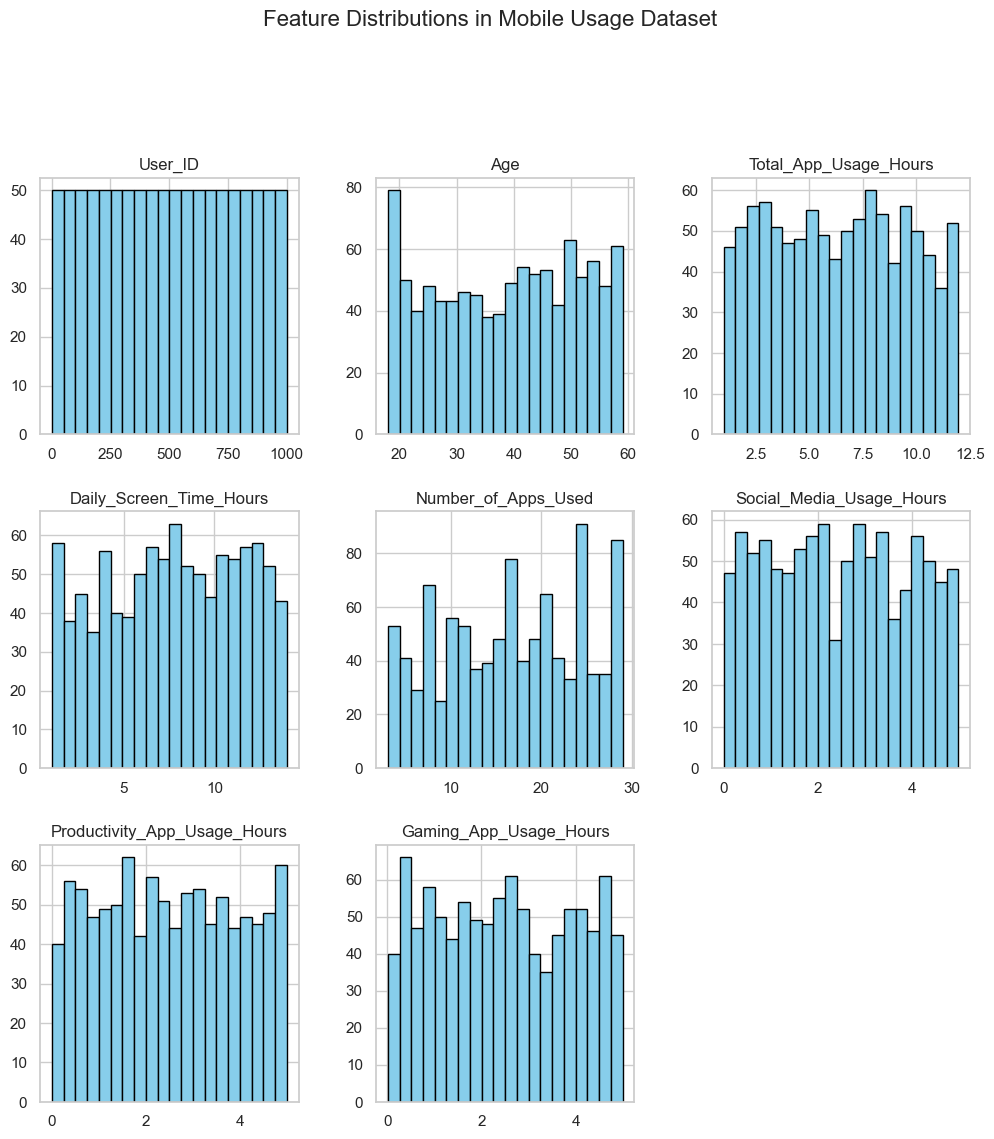

In [7]:

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

mobile_usage.hist(figsize=(12, 12), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions in Mobile Usage Dataset", y=1.02, fontsize=16)
plt.show()

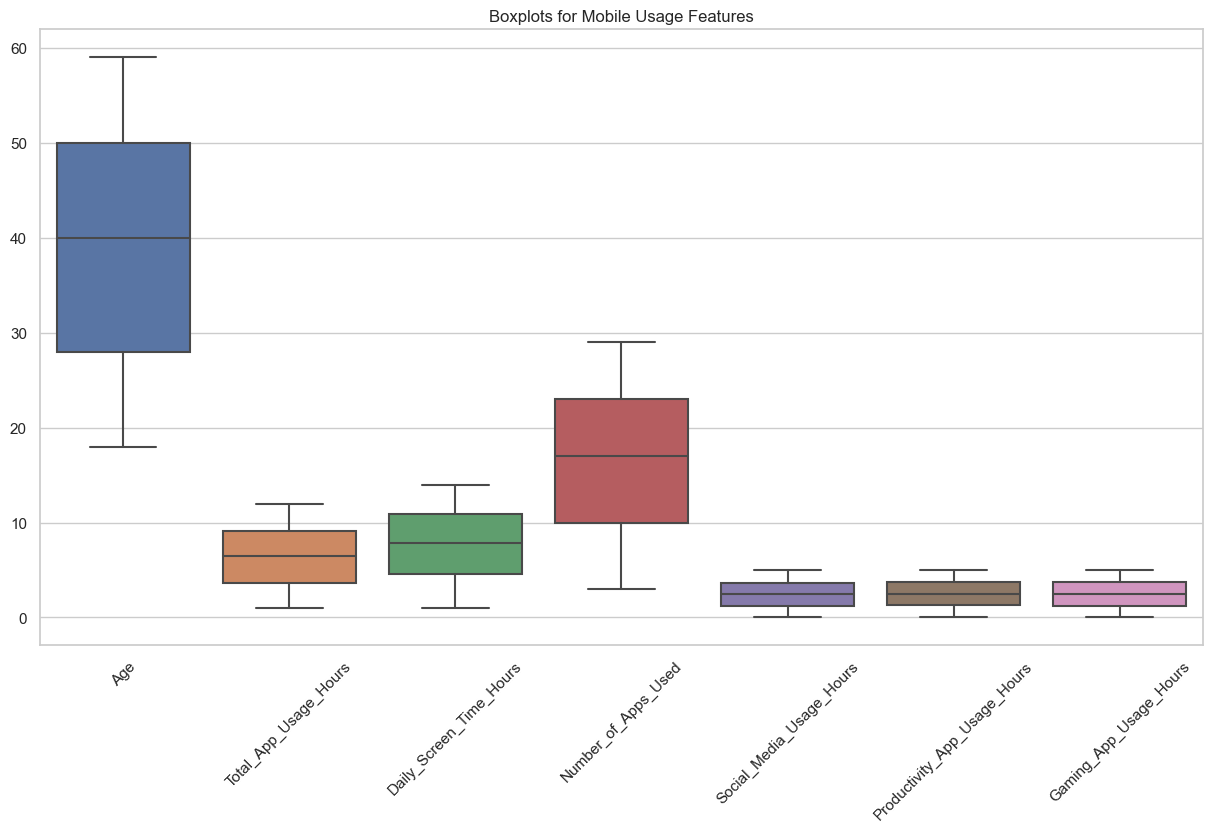

In [8]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=mobile_usage.drop(columns=['User_ID', 'Location']))
plt.title("Boxplots for Mobile Usage Features")
plt.xticks(rotation=45)
plt.show()

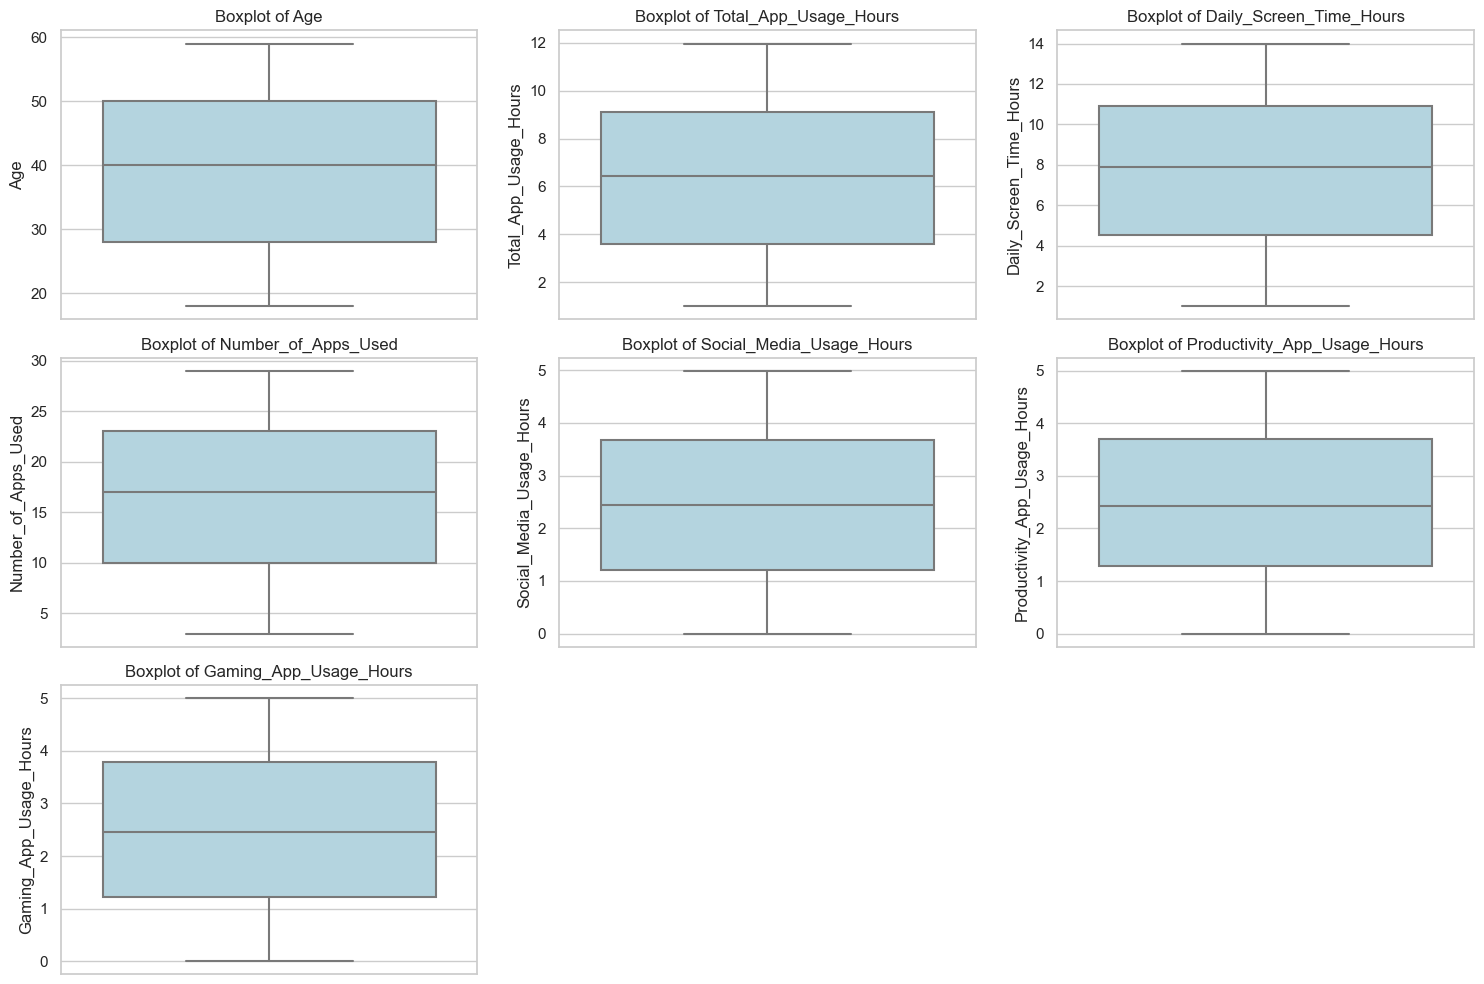

In [9]:
plt.figure(figsize=(15, 10))
numeric_features = ['Age', 'Total_App_Usage_Hours', 'Daily_Screen_Time_Hours', 
                    'Number_of_Apps_Used', 'Social_Media_Usage_Hours', 
                    'Productivity_App_Usage_Hours', 'Gaming_App_Usage_Hours']

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=mobile_usage[feature], color="lightblue")
    plt.title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()

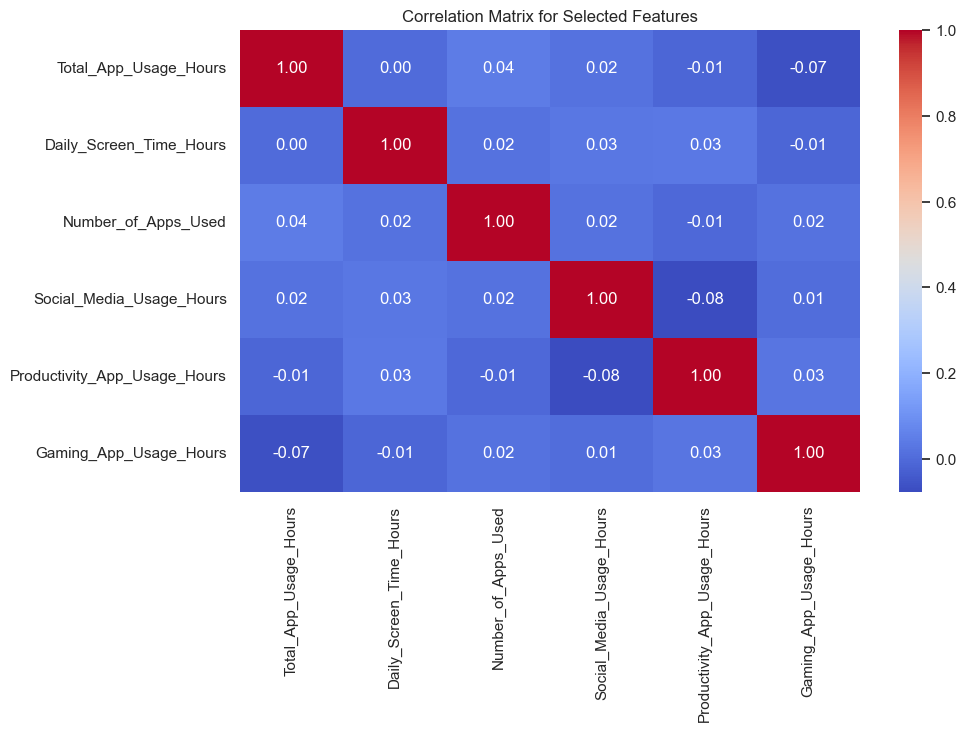

In [10]:
selected_columns = ['Total_App_Usage_Hours', 'Daily_Screen_Time_Hours', 
                    'Number_of_Apps_Used', 'Social_Media_Usage_Hours', 
                    'Productivity_App_Usage_Hours', 'Gaming_App_Usage_Hours']

correlation_matrix = mobile_usage[selected_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Selected Features")
plt.show()

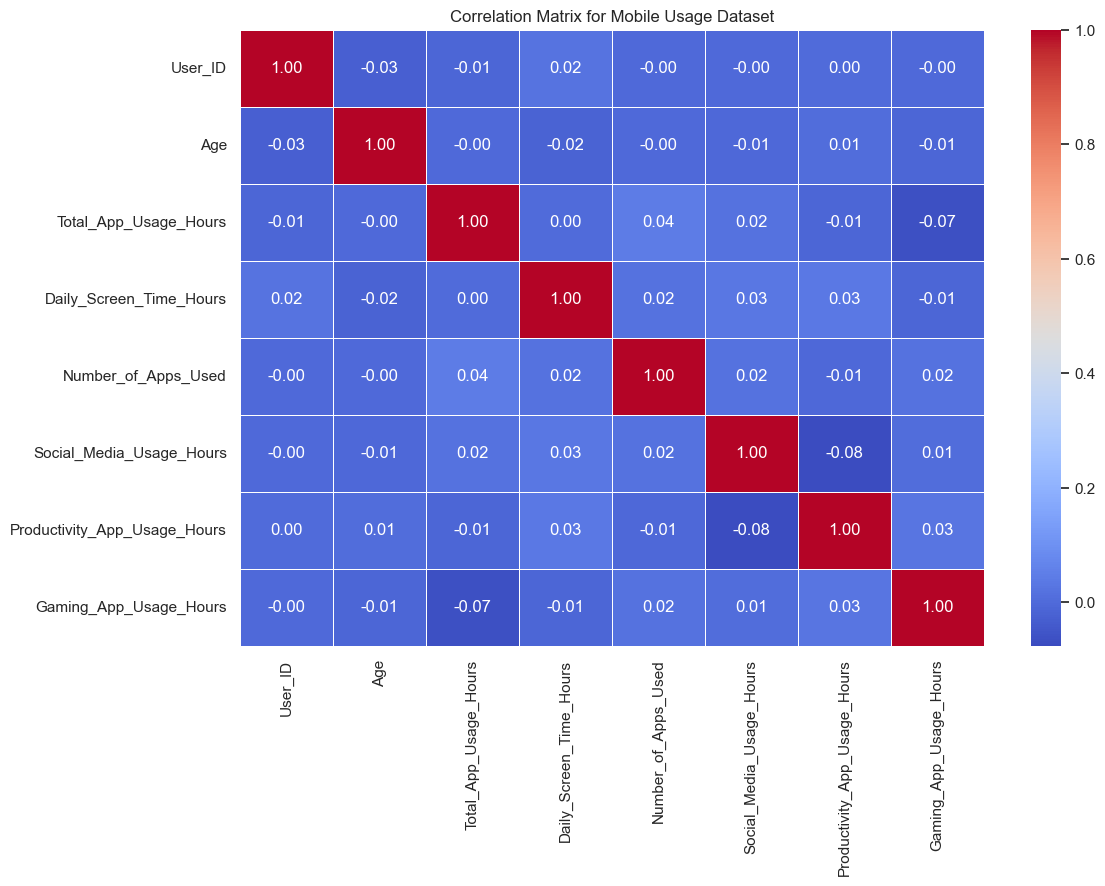

In [11]:
plt.figure(figsize=(12, 8))

numeric_columns = mobile_usage.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Mobile Usage Dataset")
plt.show()

C:\Users\MHA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


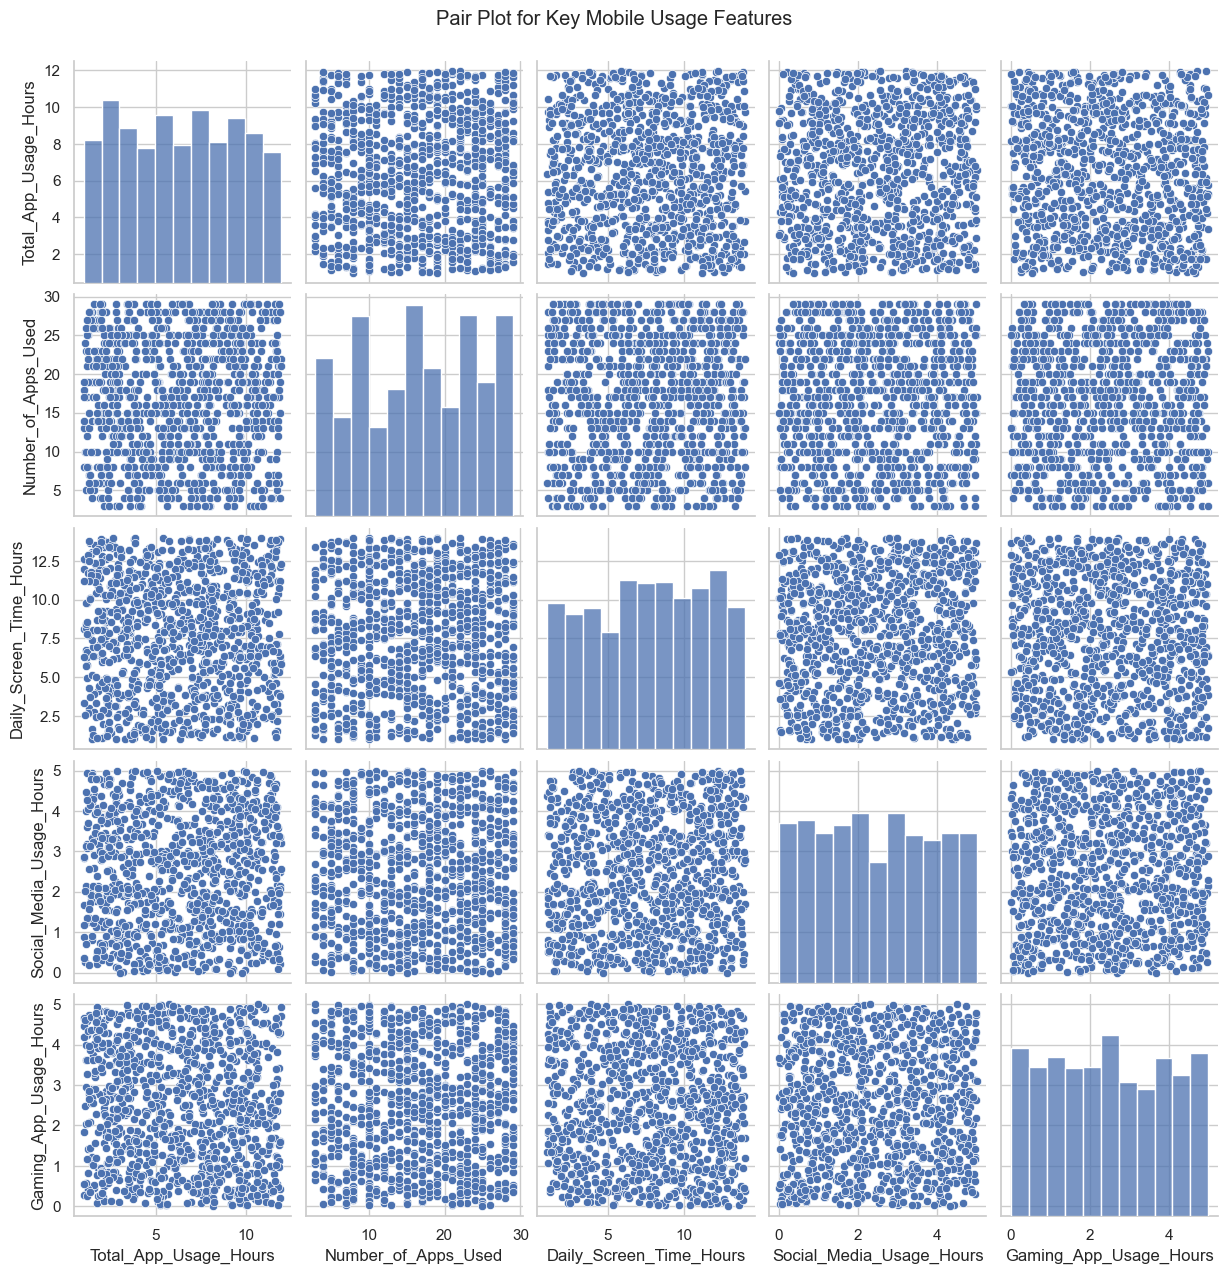

In [12]:
selected_features = ['Total_App_Usage_Hours', 'Number_of_Apps_Used', 
                     'Daily_Screen_Time_Hours', 'Social_Media_Usage_Hours', 
                     'Gaming_App_Usage_Hours']

sns.pairplot(mobile_usage[selected_features])
plt.suptitle("Pair Plot for Key Mobile Usage Features", y=1.02)
plt.show()

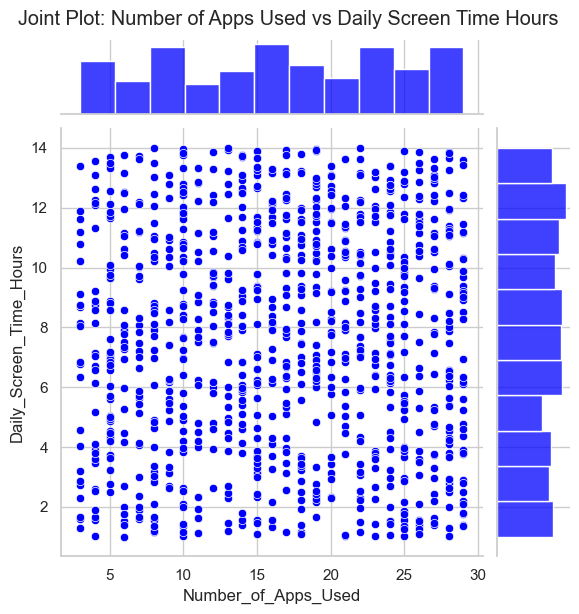

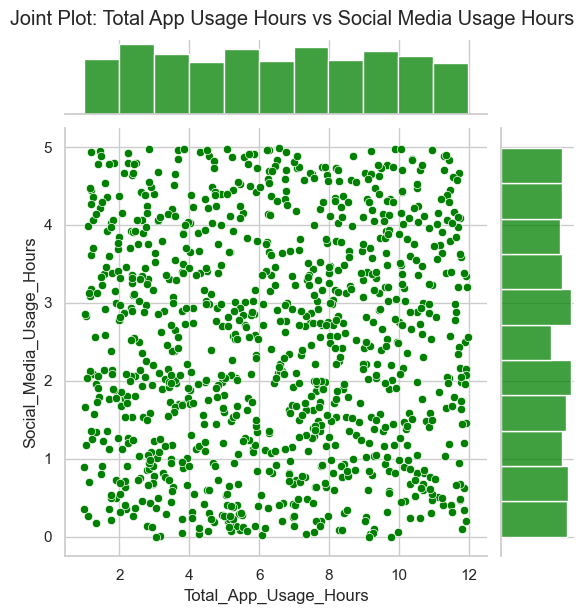

In [13]:
sns.jointplot(data=mobile_usage, x='Number_of_Apps_Used', y='Daily_Screen_Time_Hours', kind="scatter", color="blue")
plt.suptitle("Joint Plot: Number of Apps Used vs Daily Screen Time Hours", y=1.02)
plt.show()

sns.jointplot(data=mobile_usage, x='Total_App_Usage_Hours', y='Social_Media_Usage_Hours', kind="scatter", color="green")
plt.suptitle("Joint Plot: Total App Usage Hours vs Social Media Usage Hours", y=1.02)
plt.show()

In [14]:
print("Unique Locations in the Dataset:")
print(mobile_usage["Location"].unique())

print("\nCount of Users by Location:")
location_counts = mobile_usage["Location"].value_counts()
print(location_counts)

Unique Locations in the Dataset:
['Los Angeles' 'Chicago' 'Houston' 'Phoenix' 'New York']

Count of Users by Location:
Location
New York       243
Phoenix        199
Chicago        192
Los Angeles    185
Houston        181
Name: count, dtype: int64


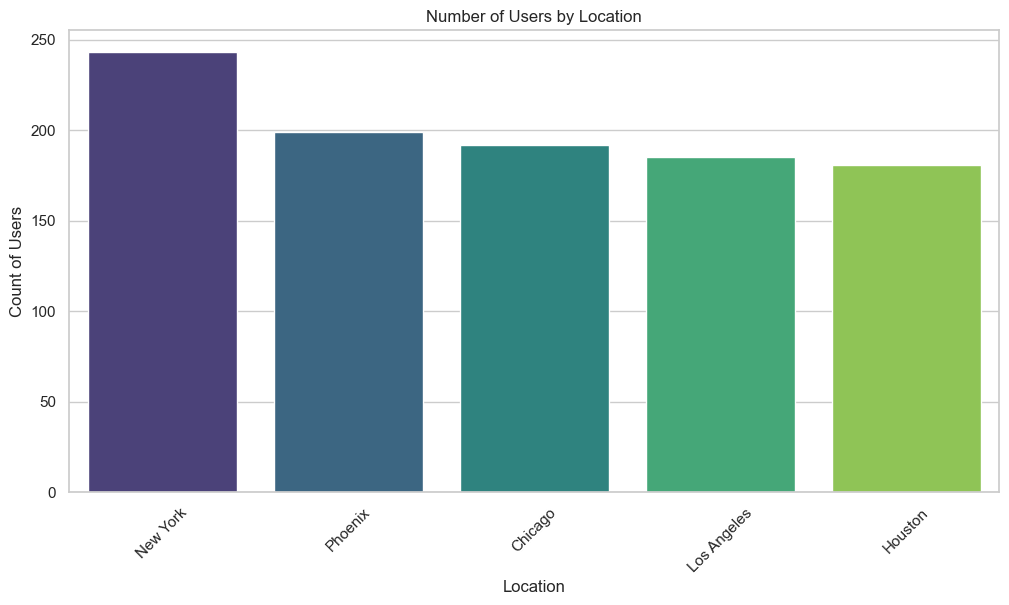

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette="viridis")
plt.title("Number of Users by Location")
plt.xlabel("Location")
plt.ylabel("Count of Users")
plt.xticks(rotation=45)
plt.show()

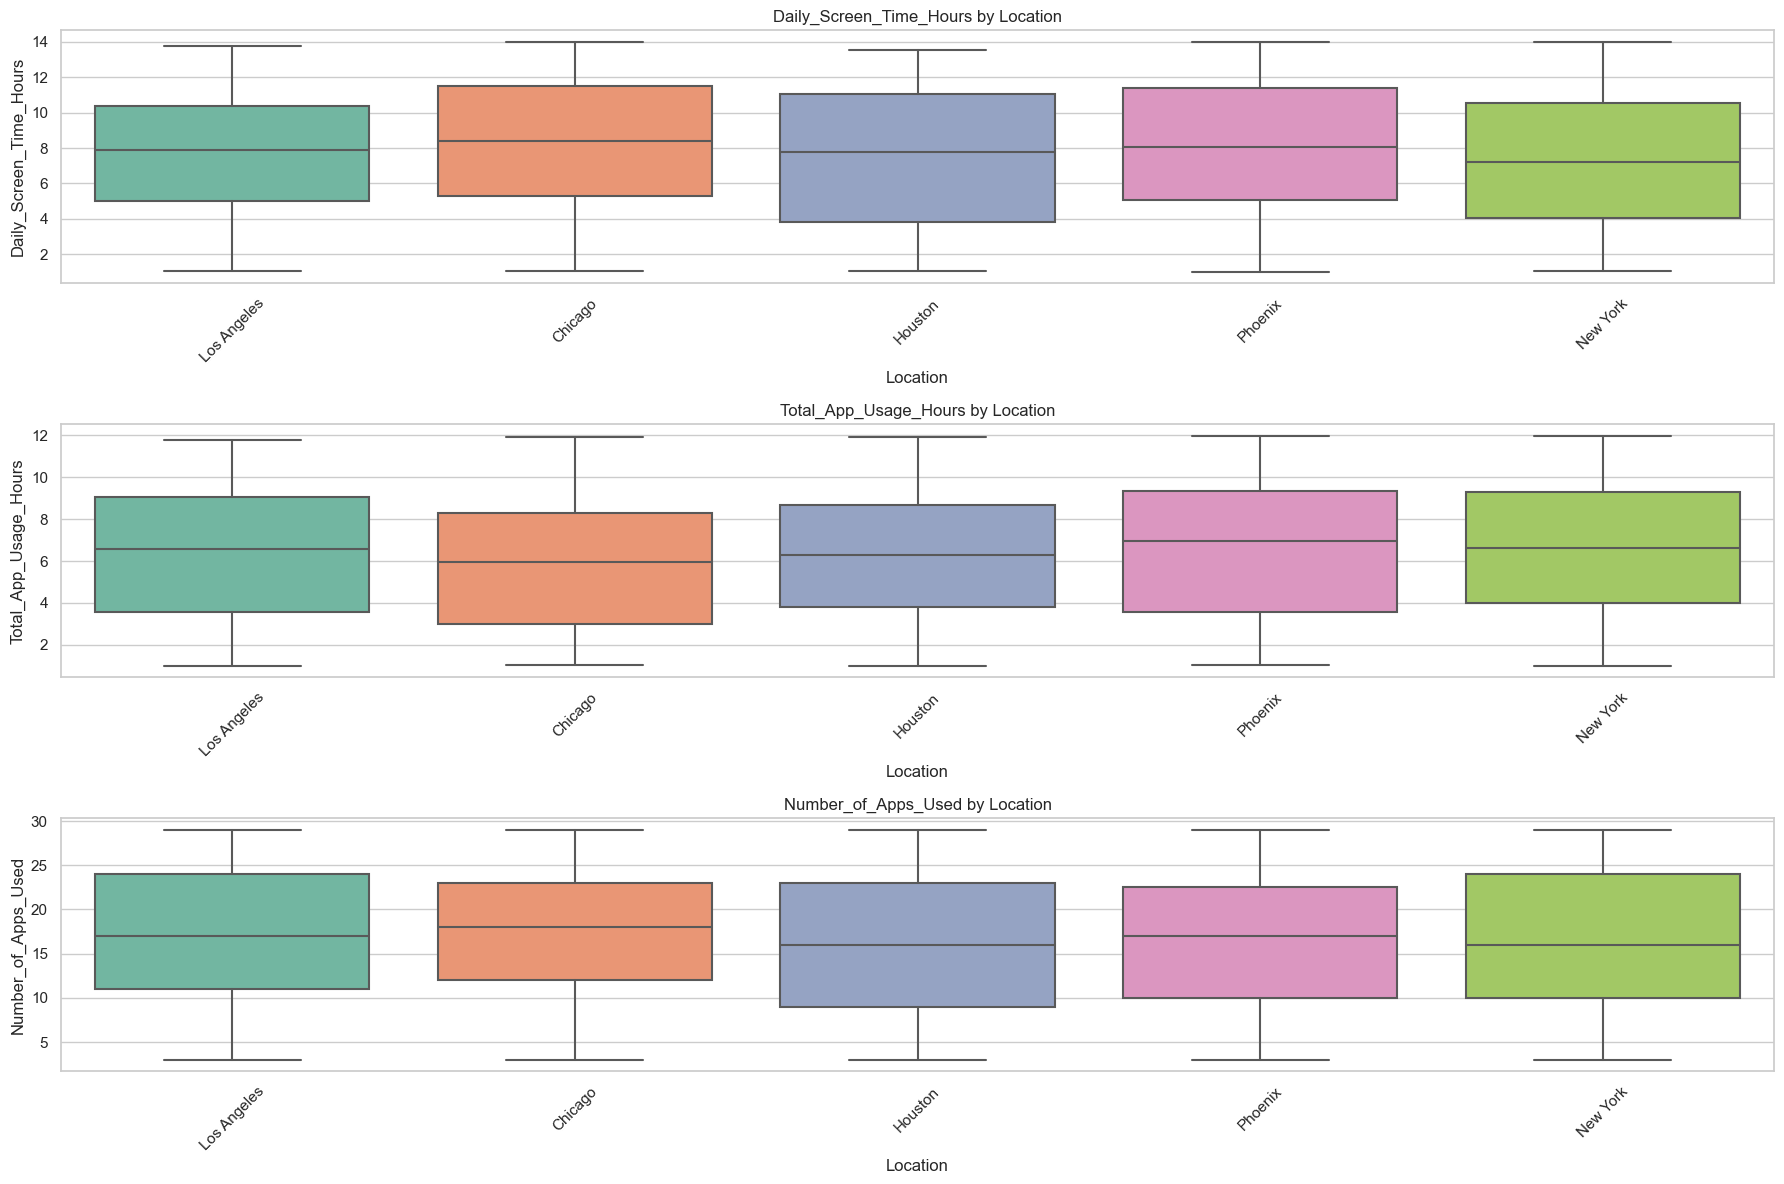

In [16]:
features_to_compare = ['Daily_Screen_Time_Hours', 'Total_App_Usage_Hours', 'Number_of_Apps_Used']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(features_to_compare, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(data=mobile_usage, x="Location", y=feature, palette="Set2")
    plt.title(f"{feature} by Location")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

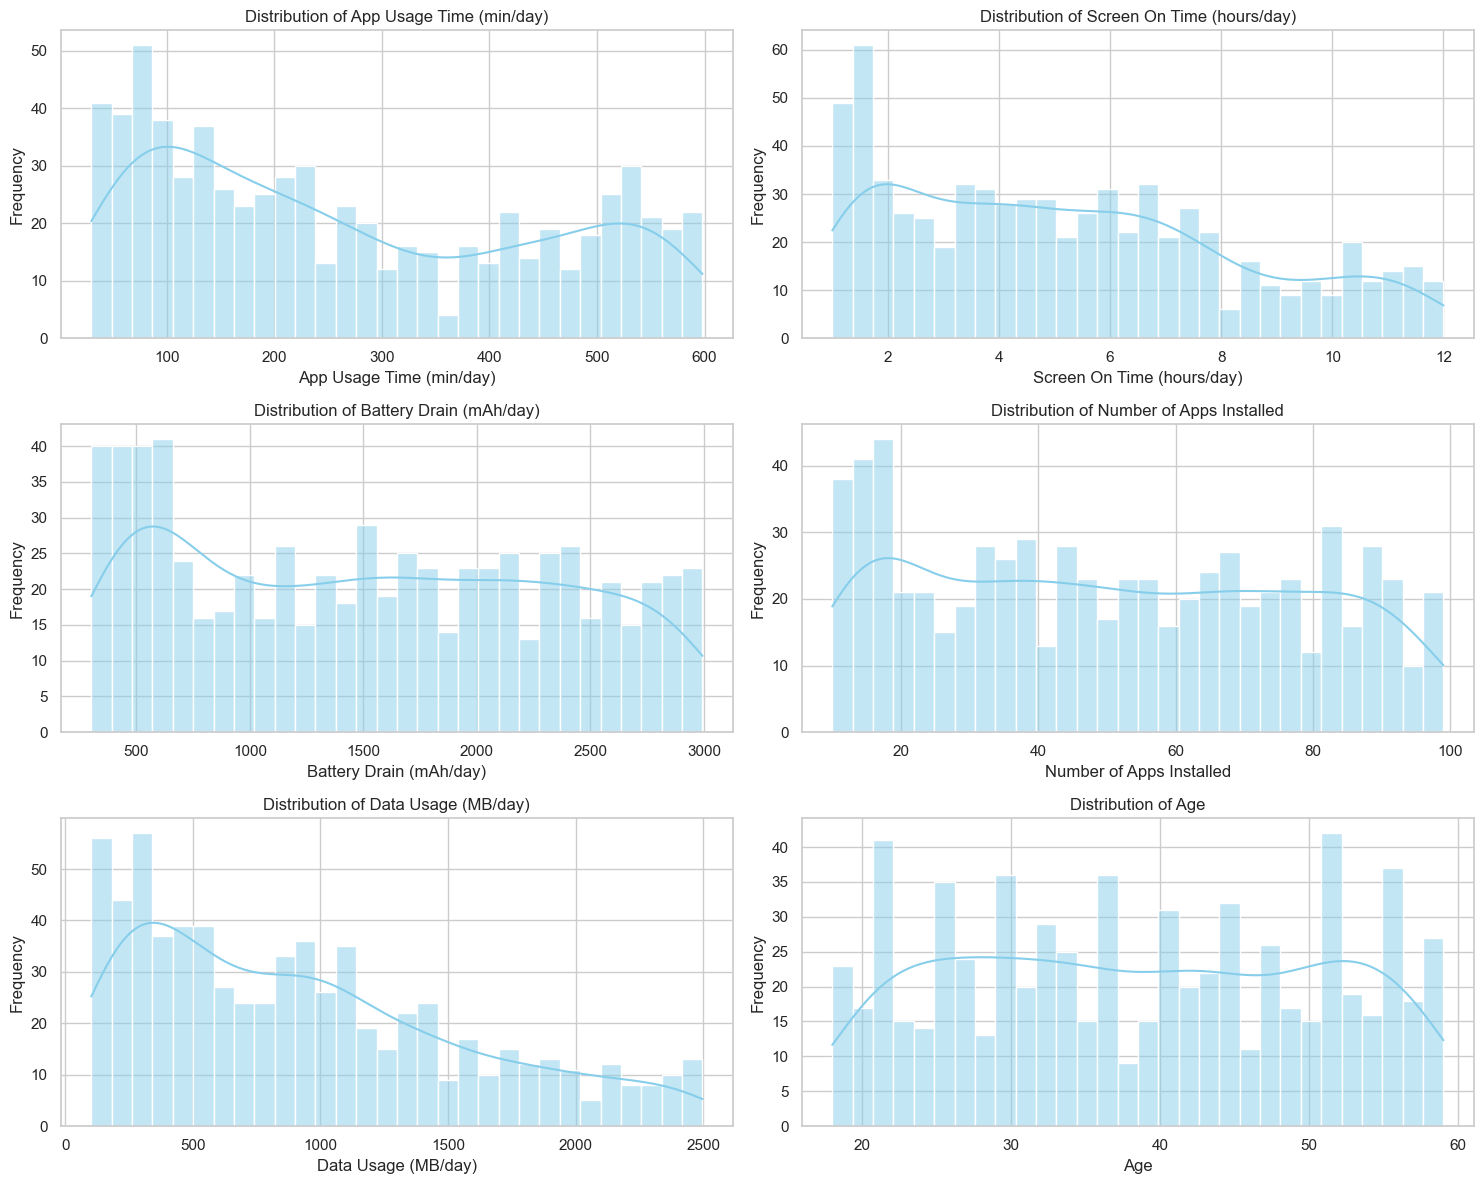

In [17]:
sns.set(style="whitegrid")

numerical_columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                     'Battery Drain (mAh/day)', 'Number of Apps Installed', 
                     'Data Usage (MB/day)', 'Age']

plt.figure(figsize=(15, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(user_behavior[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

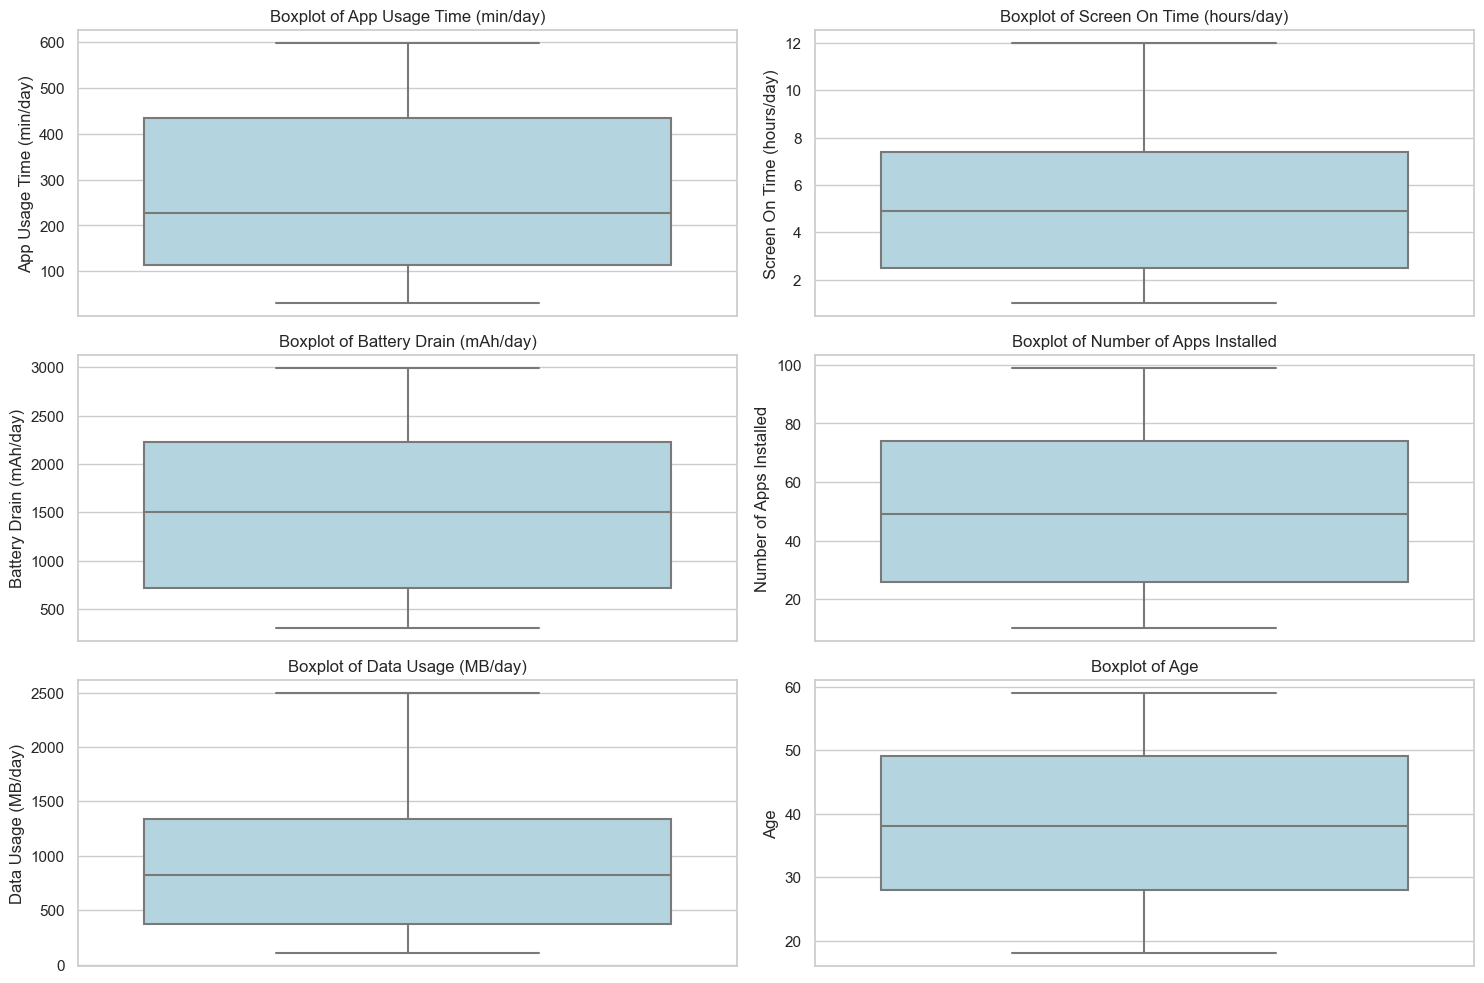

In [18]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=user_behavior[column], color='lightblue')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

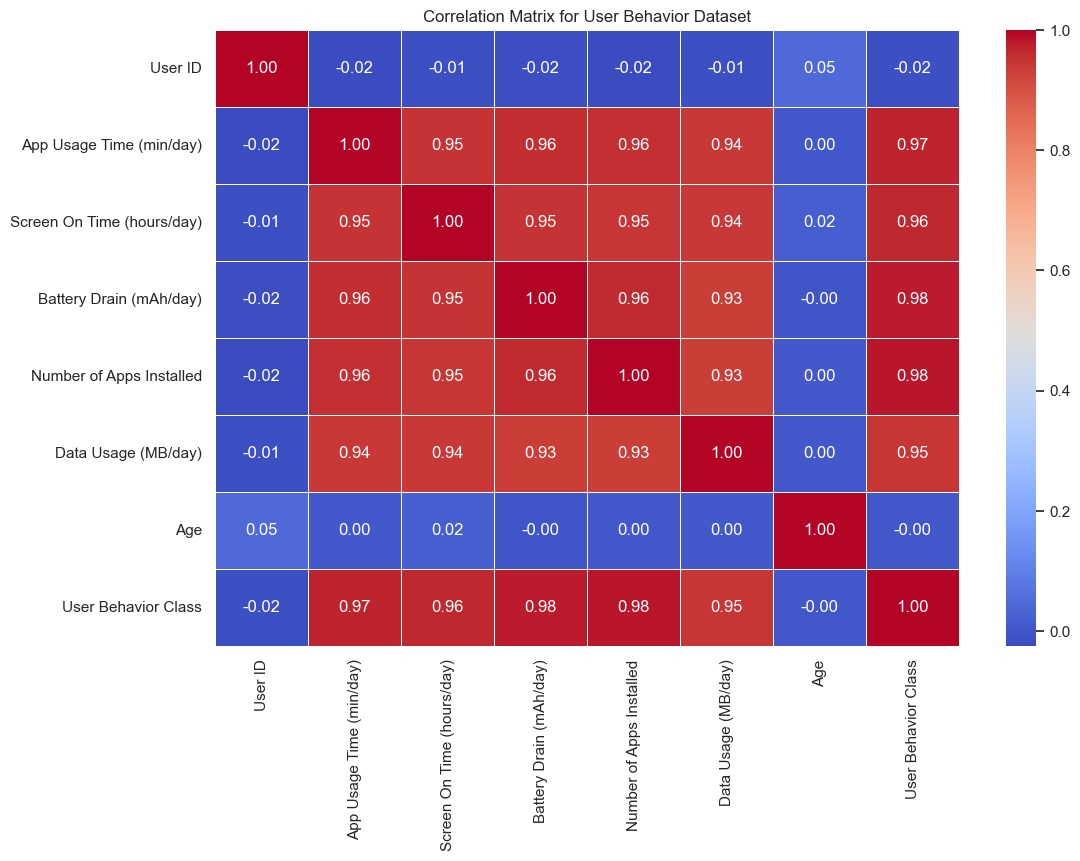

In [19]:
numeric_columns = user_behavior.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for User Behavior Dataset")
plt.show()

Explained Variance Ratio: [0.36301875 0.18504756]

Updated User Behavior Dataset with PCA Components:
   User ID    Device Model Operating System  App Usage Time (min/day)  Age  \
0        1  Google Pixel 5          Android                       393   40   
1        2       OnePlus 9          Android                       268   47   
2        3    Xiaomi Mi 11          Android                       154   42   
3        4  Google Pixel 5          Android                       239   20   
4        5       iPhone 12              iOS                       187   31   

   Gender  Battery_Efficiency  App_Usage_Efficiency  Data_Per_App     PCA_1  \
0    Male          292.500000              5.865672     16.746269 -0.729605   
1  Female          283.191489              6.380952     22.476190 -1.232766   
2    Male          190.250000              4.812500     10.062500  1.060242   
3    Male          349.166667              4.267857     15.553571  0.759303   
4  Female          317.906977     

C:\Users\MHA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


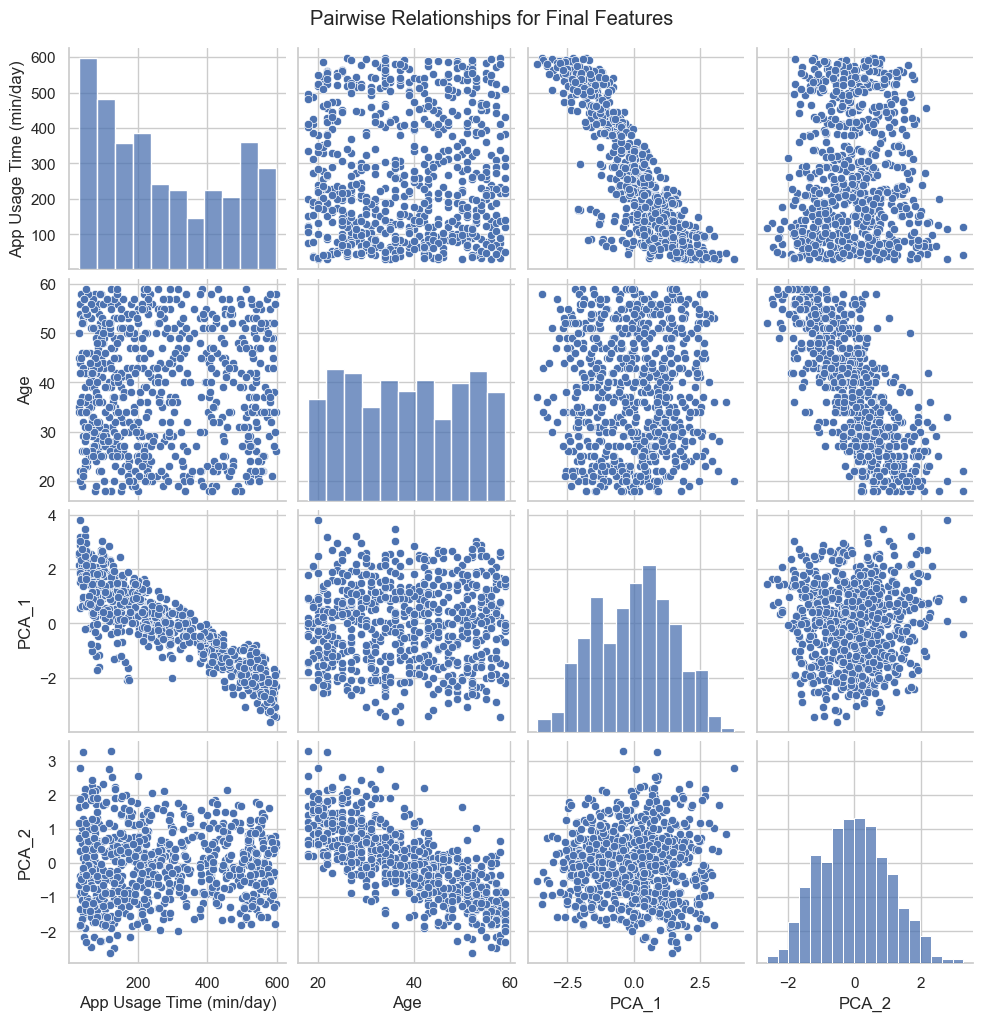

In [20]:
user_behavior['Battery_Efficiency'] = user_behavior['Battery Drain (mAh/day)'] / user_behavior['Screen On Time (hours/day)']
user_behavior['App_Usage_Efficiency'] = user_behavior['App Usage Time (min/day)'] / user_behavior['Number of Apps Installed']
user_behavior['Data_Per_App'] = user_behavior['Data Usage (MB/day)'] / user_behavior['Number of Apps Installed']

correlated_features = ['Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
                       'Number of Apps Installed', 'Data Usage (MB/day)', 'User Behavior Class']
user_behavior_reduced = user_behavior.drop(columns=correlated_features)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(user_behavior_reduced.select_dtypes(include=['float64', 'int64']))

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(pca_features, columns=['PCA_1', 'PCA_2'])
user_behavior_pca = pd.concat([user_behavior_reduced.reset_index(drop=True), pca_df], axis=1)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("\nUpdated User Behavior Dataset with PCA Components:")
print(user_behavior_pca.head())

selected_features = ['App Usage Time (min/day)', 'Age', 'PCA_1', 'PCA_2']
sns.pairplot(user_behavior_pca[selected_features])
plt.suptitle("Pairwise Relationships for Final Features", y=1.02)
plt.show()

In [21]:
mobile_features = mobile_usage[['Total_App_Usage_Hours', 'Daily_Screen_Time_Hours', 'Number_of_Apps_Used']].copy()
user_features = user_behavior_pca[['App Usage Time (min/day)', 'Battery_Efficiency', 'App_Usage_Efficiency']].copy()

print("Mobile Features (First 5 rows):")
print(mobile_features.head())

print("\nUser Features (First 5 rows):")
print(user_features.head())

Mobile Features (First 5 rows):
   Total_App_Usage_Hours  Daily_Screen_Time_Hours  Number_of_Apps_Used
0                   2.61                     7.15                   24
1                   2.13                    13.79                   18
2                   7.28                     4.50                   11
3                   1.20                     6.29                   21
4                   6.31                    12.59                   14

User Features (First 5 rows):
   App Usage Time (min/day)  Battery_Efficiency  App_Usage_Efficiency
0                       393          292.500000              5.865672
1                       268          283.191489              6.380952
2                       154          190.250000              4.812500
3                       239          349.166667              4.267857
4                       187          317.906977              3.224138


In [22]:
scaler = StandardScaler()

mobile_features_scaled = scaler.fit_transform(mobile_features)
mobile_features_scaled = pd.DataFrame(mobile_features_scaled, columns=mobile_features.columns)

user_features_scaled = scaler.fit_transform(user_features)
user_features_scaled = pd.DataFrame(user_features_scaled, columns=user_features.columns)

print("Scaled Mobile Features (First 5 rows):")
print(mobile_features_scaled.head())

print("\nScaled User Features (First 5 rows):")
print(user_features_scaled.head())

Scaled Mobile Features (First 5 rows):
   Total_App_Usage_Hours  Daily_Screen_Time_Hours  Number_of_Apps_Used
0              -1.211402                -0.147161             0.965493
1              -1.364596                 1.641473             0.177657
2               0.279046                -0.860998            -0.741485
3              -1.661408                -0.378821             0.571575
4              -0.030533                 1.318226            -0.347567

Scaled User Features (First 5 rows):
   App Usage Time (min/day)  Battery_Efficiency  App_Usage_Efficiency
0                  0.688256           -0.137422              0.623336
1                 -0.017668           -0.271366              1.022816
2                 -0.661471           -1.608735             -0.193153
3                 -0.181443            0.677975             -0.615396
4                 -0.475107            0.228168             -1.424557


In [23]:
cosine_sim = cosine_similarity(mobile_features_scaled, user_features_scaled)

print("Shape of Cosine Similarity Matrix:", cosine_sim.shape)

similarity_df = pd.DataFrame(cosine_sim, 
                             index=mobile_features_scaled.index, 
                             columns=user_features_scaled.index)

print("Top 5 rows of Cosine Similarity Matrix:")
print(similarity_df.head())

Shape of Cosine Similarity Matrix: (1000, 700)
Top 5 rows of Cosine Similarity Matrix:
        0         1         2         3         4         5         6    \
0 -0.144939  0.636885  0.312698 -0.326432 -0.352619 -0.174558 -0.167286   
1 -0.524221 -0.105700 -0.472794  0.625764  0.236598  0.744215 -0.943254   
2 -0.138232 -0.427751  0.656231 -0.163037  0.409215 -0.291935  0.615406   
3 -0.435725  0.376805  0.508015 -0.183064 -0.040779 -0.051587 -0.198777   
4 -0.327201 -0.493824 -0.852027  0.874547  0.391269  0.894996 -0.887963   

        7         8         9    ...       690       691       692       693  \
0 -0.188640 -0.787616 -0.387362  ... -0.071410  0.294911 -0.803514 -0.331225   
1 -0.658433 -0.828131 -0.584166  ... -0.285993 -0.470583 -0.887557 -0.325196   
2  0.025509  0.918180 -0.026706  ...  0.798761  0.671332  0.657685 -0.288771   
3 -0.441594 -0.625311 -0.647758  ...  0.264198  0.498981 -0.812496 -0.635210   
4 -0.457456 -0.366269 -0.217407  ... -0.411800 -0.839732 -0.34

In [24]:
matched_pairs = []

similarity_copy = similarity_df.copy()

for i in range(similarity_copy.shape[0]):
    if similarity_copy.iloc[i].notna().any():
        best_match = similarity_copy.iloc[i].idxmax()
        matched_pairs.append((i, best_match, similarity_copy.at[i, best_match]))   
        similarity_copy.drop(columns=best_match, inplace=True)
    else:
        print(f"Row {i} has no valid matches and is being skipped.")

matched_df = pd.DataFrame(matched_pairs, columns=["Mobile_Index", "User_Index", "Similarity_Score"])

print("Top 5 Matched Pairs Based on Similarity:")
print(matched_df.head())

Row 700 has no valid matches and is being skipped.
Row 701 has no valid matches and is being skipped.
Row 702 has no valid matches and is being skipped.
Row 703 has no valid matches and is being skipped.
Row 704 has no valid matches and is being skipped.
Row 705 has no valid matches and is being skipped.
Row 706 has no valid matches and is being skipped.
Row 707 has no valid matches and is being skipped.
Row 708 has no valid matches and is being skipped.
Row 709 has no valid matches and is being skipped.
Row 710 has no valid matches and is being skipped.
Row 711 has no valid matches and is being skipped.
Row 712 has no valid matches and is being skipped.
Row 713 has no valid matches and is being skipped.
Row 714 has no valid matches and is being skipped.
Row 715 has no valid matches and is being skipped.
Row 716 has no valid matches and is being skipped.
Row 717 has no valid matches and is being skipped.
Row 718 has no valid matches and is being skipped.
Row 719 has no valid matches an

Summary Statistics for Similarity Scores:
count    700.000000
mean       0.870235
std        0.217024
min       -0.920845
25%        0.834930
50%        0.968766
75%        0.996503
max        0.999981
dtype: float64


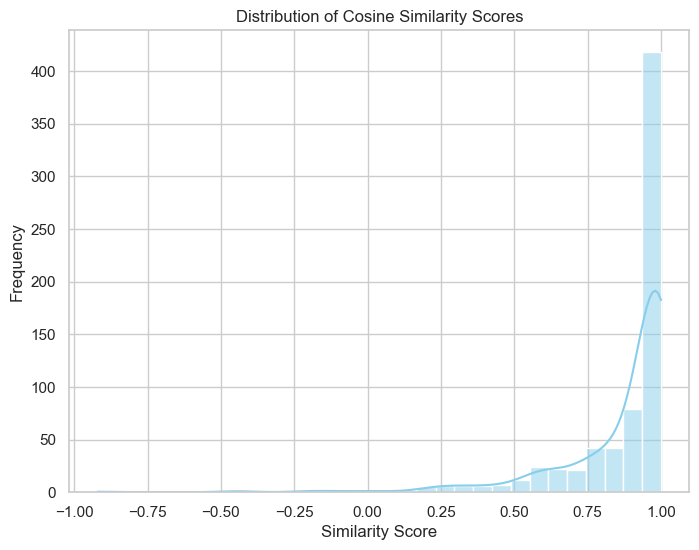

In [25]:
similarity_scores = [score for _, _, score in matched_pairs]
print("Summary Statistics for Similarity Scores:")
print(pd.Series(similarity_scores).describe())

plt.figure(figsize=(8, 6))
sns.histplot(similarity_scores, bins=30, kde=True, color="skyblue")
plt.title("Distribution of Cosine Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()

In [26]:
matched_mobile_indices = [pair[0] for pair in matched_pairs]
matched_user_indices = [pair[1] for pair in matched_pairs]

final_mobile_features = mobile_features_scaled.iloc[matched_mobile_indices].reset_index(drop=True)
final_user_features = user_features_scaled.iloc[matched_user_indices].reset_index(drop=True)

final_merged_dataset = pd.concat([final_mobile_features, final_user_features], axis=1)

print("Shape of Final Merged Dataset:", final_merged_dataset.shape)
print("\nFirst 5 Rows of Final Merged Dataset:")
print(final_merged_dataset.head())


Shape of Final Merged Dataset: (700, 6)

First 5 Rows of Final Merged Dataset:
   Total_App_Usage_Hours  Daily_Screen_Time_Hours  Number_of_Apps_Used  \
0              -1.211402                -0.147161             0.965493   
1              -1.364596                 1.641473             0.177657   
2               0.279046                -0.860998            -0.741485   
3              -1.661408                -0.378821             0.571575   
4              -0.030533                 1.318226            -0.347567   

   App Usage Time (min/day)  Battery_Efficiency  App_Usage_Efficiency  
0                 -0.723592           -0.066398              0.695174  
1                 -0.672766            0.777174              0.139343  
2                  0.208227           -0.657402             -0.653135  
3                 -1.107615           -0.279423              0.548569  
4                 -0.074142            1.539942             -0.533974  


C:\Users\MHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\MHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\MHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\MHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with M

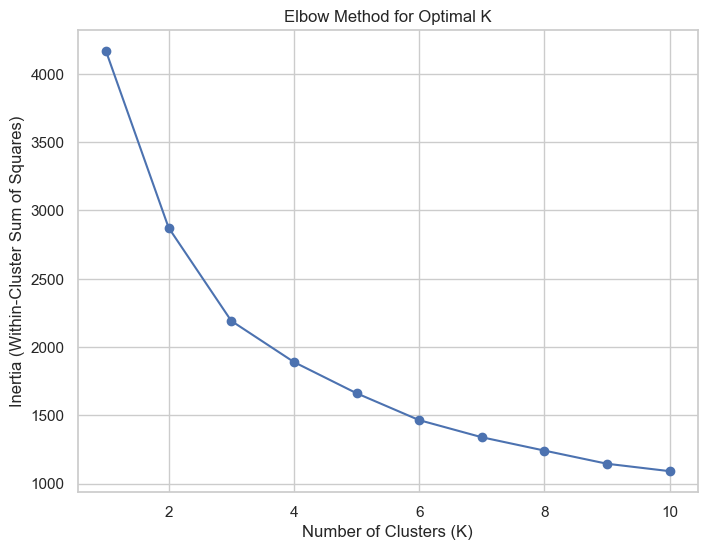

In [27]:
inertia = []
K = range(1, 11)  

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(final_merged_dataset)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

C:\Users\MHA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Cluster Centers:
   Total_App_Usage_Hours  Daily_Screen_Time_Hours  Number_of_Apps_Used  \
0              -0.400869                 1.022413            -0.237685   
1               0.761120                -0.114662             0.525416   
2              -0.646000                -0.793556            -0.518809   

   App Usage Time (min/day)  Battery_Efficiency  App_Usage_Efficiency  
0                 -0.659539            1.153607             -0.472569  
1                  0.991654           -0.223789              0.793812  
2                 -0.761485           -0.707904             -0.658059  

First 5 Rows with Assigned Clusters:
   Total_App_Usage_Hours  Daily_Screen_Time_Hours  Number_of_Apps_Used  \
0              -1.211402                -0.147161             0.965493   
1              -1.364596                 1.641473             0.177657   
2               0.279046                -0.860998            -0.741485   
3              -1.661408                -0.378821             0.

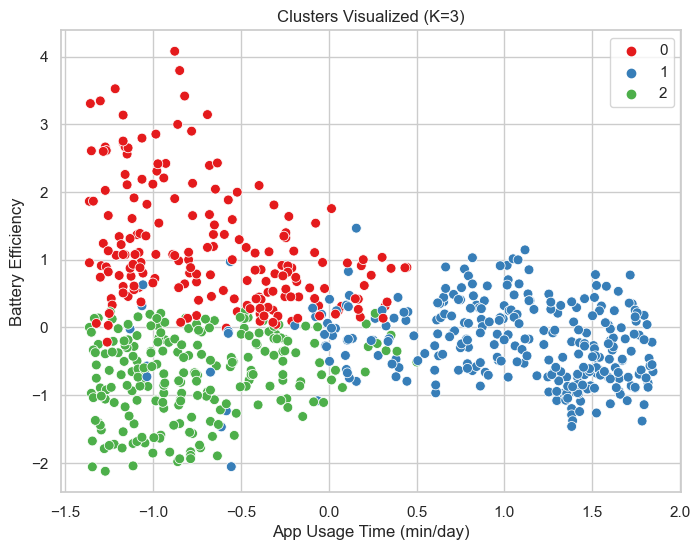

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
final_merged_dataset['Cluster'] = kmeans.fit_predict(final_merged_dataset)

print("Cluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=final_merged_dataset.columns[:-1]))

print("\nFirst 5 Rows with Assigned Clusters:")
print(final_merged_dataset.head())

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='App Usage Time (min/day)', y='Battery_Efficiency', 
    hue='Cluster', data=final_merged_dataset, palette='Set1', s=50
)
plt.title("Clusters Visualized (K=3)")
plt.xlabel("App Usage Time (min/day)")
plt.ylabel("Battery Efficiency")
plt.legend()
plt.show()

Cluster Descriptive Statistics:
        Total_App_Usage_Hours           Daily_Screen_Time_Hours            \
                         mean       std                    mean       std   
Cluster                                                                     
0                   -0.400869  0.836374                1.022413  0.418754   
1                    0.761120  0.690832               -0.114662  0.942577   
2                   -0.646000  0.701616               -0.793556  0.626838   

        Number_of_Apps_Used           App Usage Time (min/day)            \
                       mean       std                     mean       std   
Cluster                                                                    
0                 -0.237685  0.885318                -0.659539  0.481561   
1                  0.525416  0.848834                 0.991654  0.641146   
2                 -0.518809  0.892527                -0.761485  0.427803   

        Battery_Efficiency           App_Usage_E

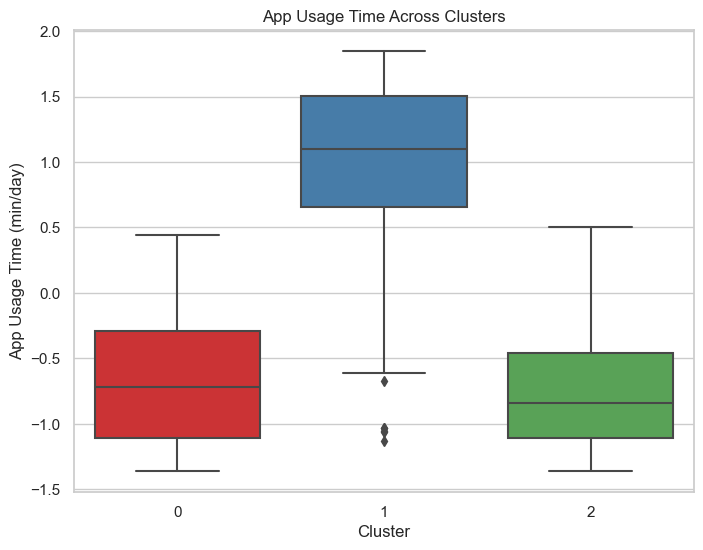

In [29]:
cluster_stats = final_merged_dataset.groupby('Cluster').agg(['mean', 'std'])
print("Cluster Descriptive Statistics:")
print(cluster_stats)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='App Usage Time (min/day)', data=final_merged_dataset, palette="Set1")
plt.title("App Usage Time Across Clusters")
plt.show()

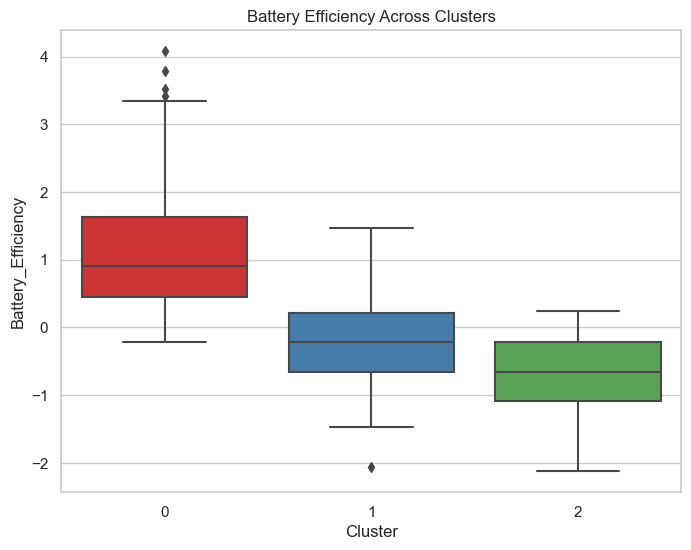

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Battery_Efficiency', data=final_merged_dataset, palette="Set1")
plt.title("Battery Efficiency Across Clusters")
plt.show()

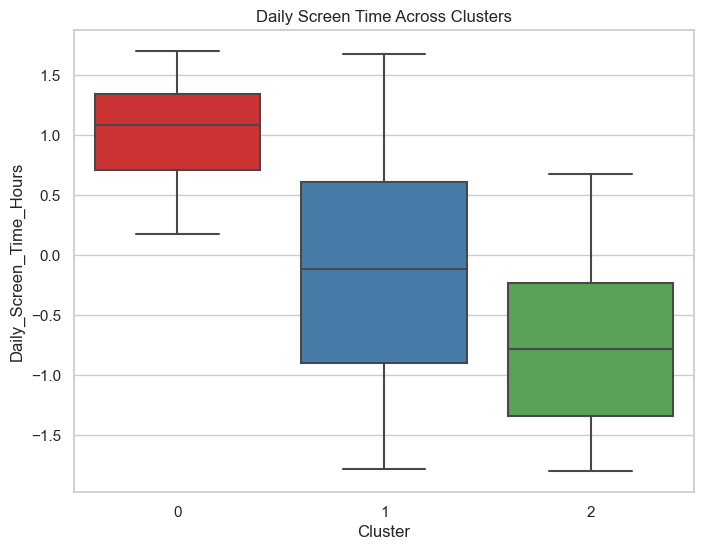

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Daily_Screen_Time_Hours', data=final_merged_dataset, palette="Set1")
plt.title("Daily Screen Time Across Clusters")
plt.show()

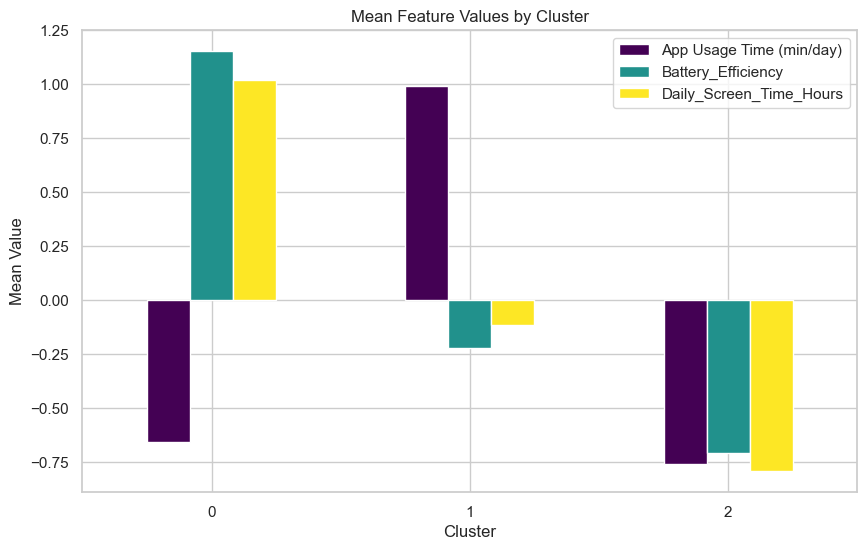

In [32]:
cluster_means = final_merged_dataset.groupby('Cluster').mean()

cluster_means[['App Usage Time (min/day)', 'Battery_Efficiency', 'Daily_Screen_Time_Hours']].plot(
    kind='bar', figsize=(10, 6), colormap='viridis', rot=0)
plt.title("Mean Feature Values by Cluster")
plt.ylabel("Mean Value")
plt.legend(loc='upper right')
plt.show()

<Figure size 1000x600 with 0 Axes>

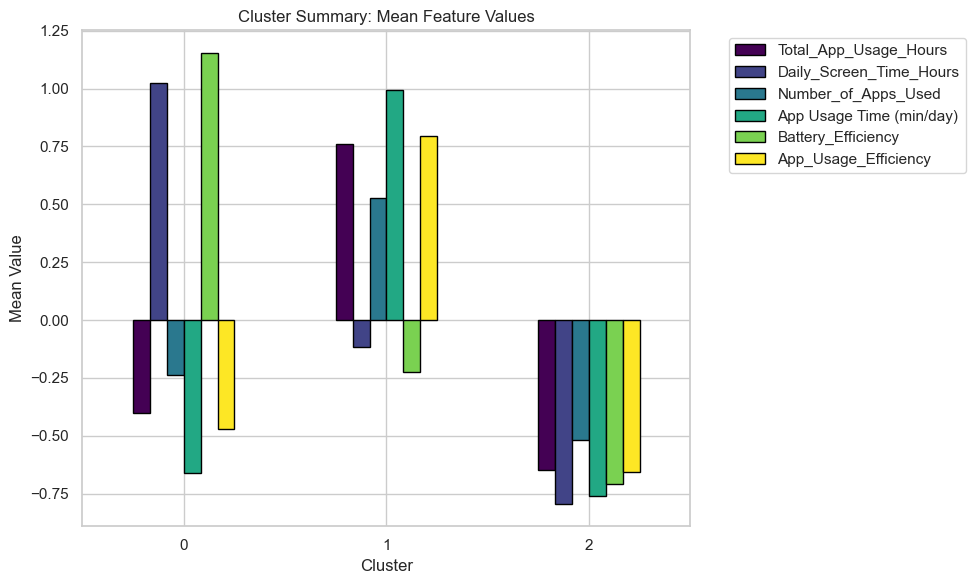

In [33]:
cluster_means = final_merged_dataset.groupby('Cluster').mean()

plt.figure(figsize=(10, 6))
cluster_means.plot(kind='bar', figsize=(10, 6), colormap='viridis', edgecolor='black')
plt.title('Cluster Summary: Mean Feature Values')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

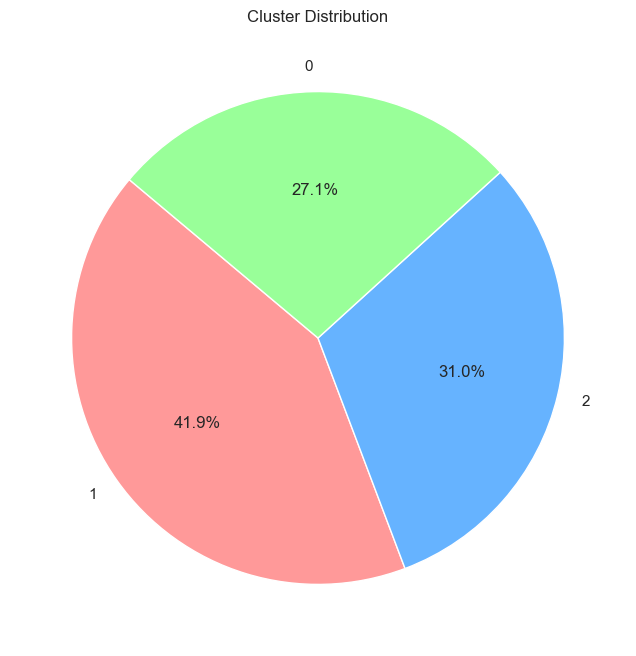

In [34]:
cluster_counts = final_merged_dataset['Cluster'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF9999','#66B3FF','#99FF99'])
plt.title('Cluster Distribution')
plt.show()

C:\Users\MHA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


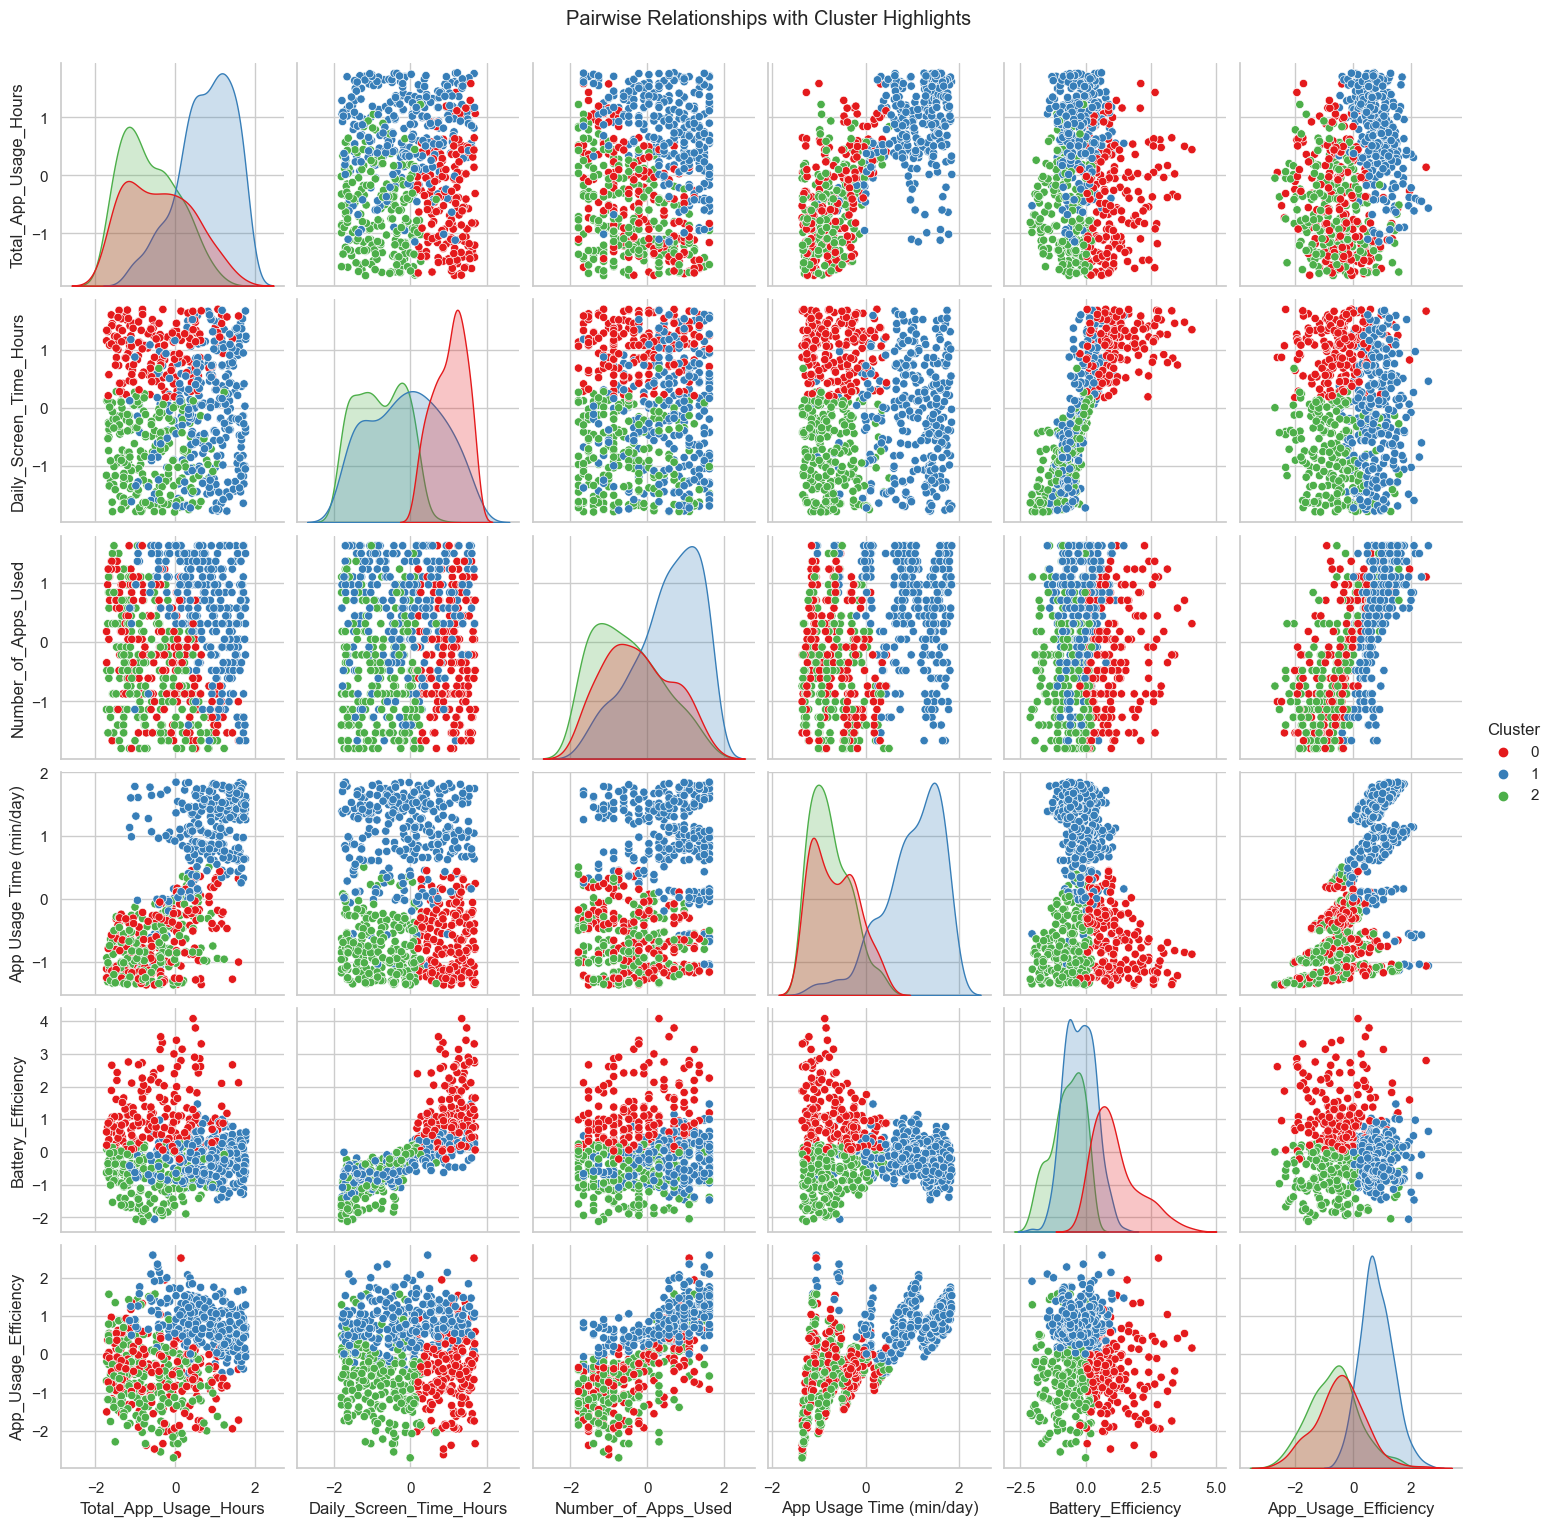

In [35]:
sns.pairplot(final_merged_dataset, hue='Cluster', palette='Set1', diag_kind='kde')
plt.suptitle('Pairwise Relationships with Cluster Highlights', y=1.02)
plt.show()

In [45]:
engagement_threshold = 0.5  
final_merged_dataset['Engagement_Level'] = np.where(
    final_merged_dataset['App Usage Time (min/day)'] > engagement_threshold, 1, 0
)

X = final_merged_dataset.drop(columns=['App Usage Time (min/day)', 'Engagement_Level'])
y = final_merged_dataset['Engagement_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Class Distribution in Training Set:")
print(y_train.value_counts(normalize=True))

print("\nClass Distribution in Testing Set:")
print(y_test.value_counts(normalize=True))

Class Distribution in Training Set:
Engagement_Level
0    0.665306
1    0.334694
Name: proportion, dtype: float64

Class Distribution in Testing Set:
Engagement_Level
0    0.666667
1    0.333333
Name: proportion, dtype: float64


In [46]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Model Accuracy on Test Set: 0.9333333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       140
           1       0.90      0.90      0.90        70

    accuracy                           0.93       210
   macro avg       0.93      0.93      0.93       210
weighted avg       0.93      0.93      0.93       210


Confusion Matrix:
[[133   7]
 [  7  63]]



Feature Importance (Top 5):
                   Feature  Coefficient
0    Total_App_Usage_Hours     2.576624
4     App_Usage_Efficiency     2.095372
1  Daily_Screen_Time_Hours     0.440405
2      Number_of_Apps_Used     0.161935
5                  Cluster    -0.106469


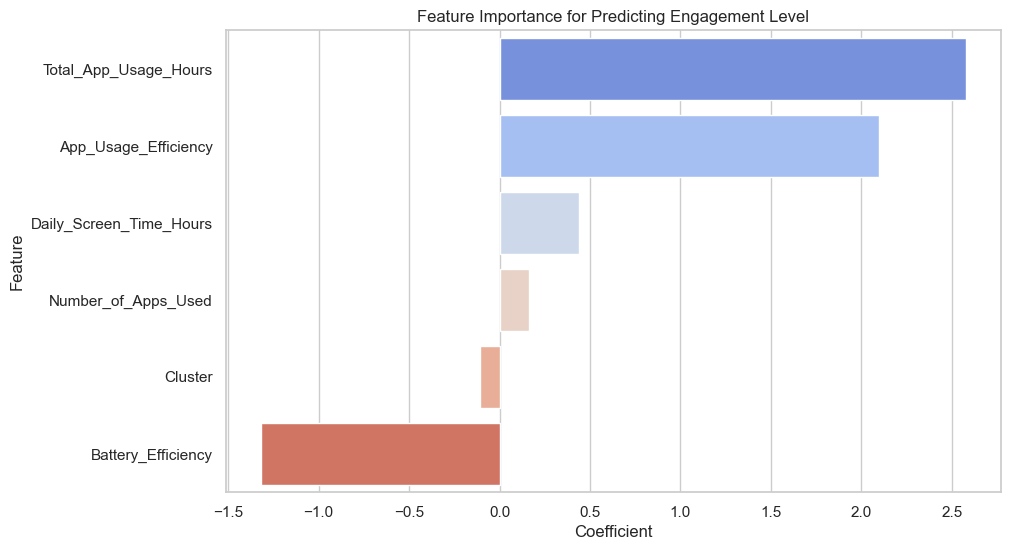

In [47]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance (Top 5):")
print(feature_importance.head(5))

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette="coolwarm")
plt.title("Feature Importance for Predicting Engagement Level")
plt.show()